In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
telco = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## How is the distribution of tenure?

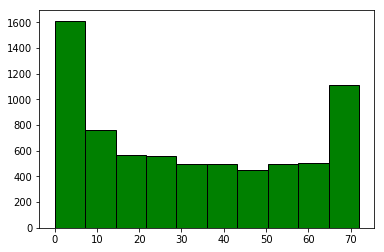

In [5]:
plt.hist(telco['tenure'],color='green',edgecolor='black')
plt.show()

## How is the distribution of monthly charges?

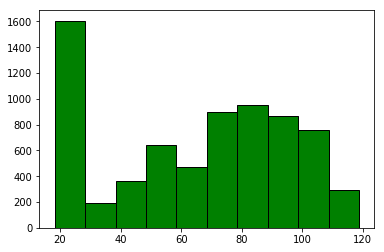

In [6]:
plt.hist(telco['MonthlyCharges'],color='green',edgecolor='black')
plt.show()

## What is the part to whole relationship of Internet Service? 

In [7]:
isvc = telco.groupby(['InternetService']).size()
isvc = pd.DataFrame(isvc)
isvc = isvc.reset_index()
isvc = isvc.rename(columns={0:'Count'})

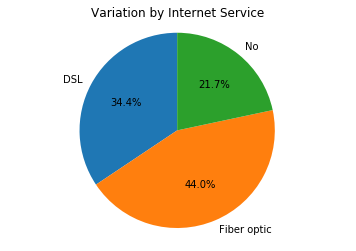

In [9]:
plt.pie(isvc['Count'],labels=isvc['InternetService'],
        autopct='%0.1f%%',startangle=90)
plt.title("Variation by Internet Service",loc='center')
plt.axis('equal')
plt.show()

## Which contract is most common? What is the percentage of most common contract?

In [12]:
contract = telco.groupby(['Contract']).size()
contract = pd.DataFrame(contract)
contract = contract.reset_index()
contract = contract.rename(columns={0:'Count'})

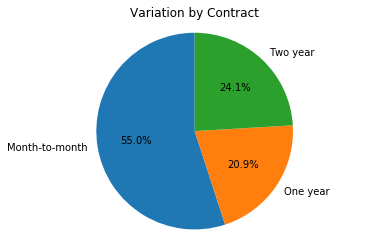

In [37]:
plt.pie(contract['Count'],labels=contract['Contract'],
        autopct='%0.1f%%',startangle=90)
plt.title("Variation by Contract",loc='center')
plt.axis('equal')
plt.show()

## What is the part to whole relationship of MultipleLines? 

In [16]:
ml = telco.groupby(['MultipleLines']).size()
ml = pd.DataFrame(ml)
ml = ml.reset_index()
ml = ml.rename(columns={0:'Count'})

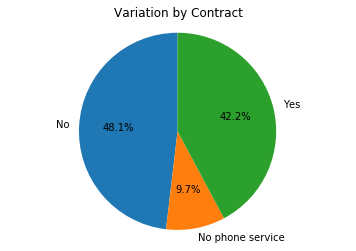

In [17]:
plt.pie(ml['Count'],labels=ml['MultipleLines'],
        autopct='%0.1f%%',startangle=90)
plt.title("Variation by Contract",loc='center')
plt.axis('equal')
plt.show()

## What is the ratio of churn and not churn?

In [18]:
churn = telco.groupby(['Churn']).size()
churn = pd.DataFrame(churn)
churn = churn.reset_index()
churn = churn.rename(columns={0:'Count'})

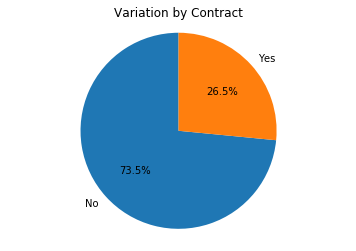

In [19]:
plt.pie(churn['Count'],labels=churn['Churn'],
        autopct='%0.1f%%',startangle=90)
plt.title("Variation by Contract",loc='center')
plt.axis('equal')
plt.show()

## What is the percentage of senior citizens?

In [20]:
senior = telco.groupby(['SeniorCitizen']).size()
senior = pd.DataFrame(senior)
senior = senior.reset_index()
senior = senior.rename(columns={0:'Count'})

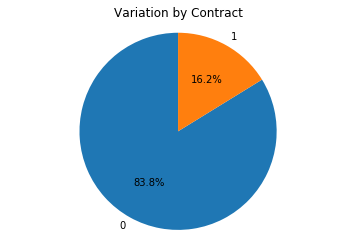

In [21]:
plt.pie(senior['Count'],labels=senior['SeniorCitizen'],
        autopct='%0.1f%%',startangle=90)
plt.title("Variation by Contract",loc='center')
plt.axis('equal')
plt.show()

## What is the part to whole relationship of Payment Method based on Internet Service

In [39]:
pmt_by_is = telco.groupby(['PaymentMethod','InternetService']).size()
pmt_by_is = pd.DataFrame(pmt_by_is)
pmt_by_is = pmt_by_is.reset_index()
pmt_by_is = pmt_by_is.rename(columns={0:'Count'})

In [40]:
pmt_by_is.head()

,PaymentMethod,InternetService,Count
0,Bank transfer (automatic),DSL,566
1,Bank transfer (automatic),Fiber optic,646
2,Bank transfer (automatic),No,332
3,Credit card (automatic),DSL,594
4,Credit card (automatic),Fiber optic,597


In [25]:
pmt_by_is.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

C:\Users\Vijaya\Anaconda3\lib\site-packages\matplotlib\legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


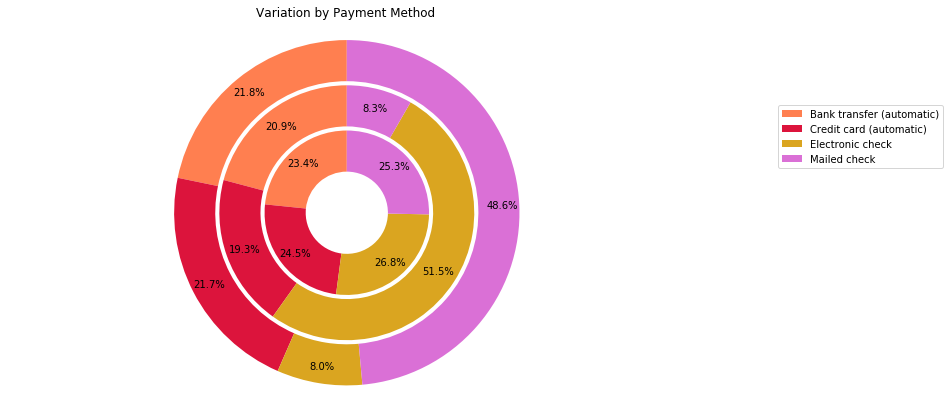

In [36]:
plt.figure(figsize=(12,7))
col=['coral','crimson','goldenrod','orchid']
pie = plt.pie(pmt_by_is[pmt_by_is['InternetService']=='DSL']['Count'],
        autopct='%0.1f%%',pctdistance=0.8,startangle=90,
        wedgeprops=dict(width=0.5),radius=1,colors=col)
plt.pie(pmt_by_is[pmt_by_is['InternetService']=='Fiber optic']['Count'],
        autopct='%0.1f%%',pctdistance=0.85,startangle=90,
        wedgeprops=dict(width=0.5),radius=1.55,colors=col)
plt.pie(pmt_by_is[pmt_by_is['InternetService']=='No']['Count'],
        autopct='%0.1f%%',pctdistance=0.9,startangle=90,
        wedgeprops=dict(width=0.5),radius=2.1,colors=col)
plt.title("Variation by Payment Method",loc='center')
plt.legend(pie[0],labels=pmt_by_is[pmt_by_is['InternetService']=='DSL']['PaymentMethod'], 
           loc="right",bbox_to_anchor=(1.4,0.7))
plt.axis('equal')
plt.show()